In [2]:
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/home/ppp/anaconda3/envs/python-3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
data = pd.read_csv("digit-recognizor.csv")

In [4]:
x = data.iloc[:,1:]
y = data.iloc[:,0]

In [5]:
x.shape

(42000, 784)

In [6]:
y.shape

(42000,)

In [8]:
pca_line = PCA().fit(x)

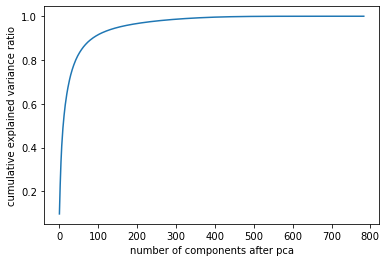

In [9]:
plt.figure()
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))
plt.xlabel("number of components after pca")
plt.ylabel("cumulative explained variance ratio")
plt.show()

In [11]:
score = []
for i in range(1, 101, 10):
    x_dr = PCA(i).fit_transform(x)
    once = cross_val_score(RFC(n_estimators=10, random_state=0), x_dr, y, cv=5).mean()
    score.append(once)

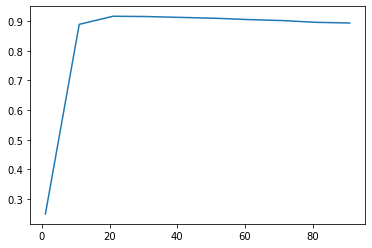

In [12]:
plt.figure()
plt.plot(range(1, 101, 10), score)
plt.show()

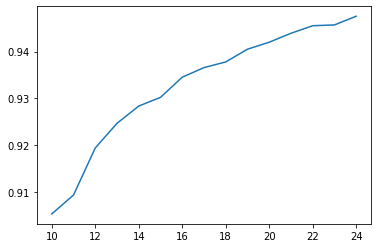

In [15]:
score = []
for i in range(10, 25):
    x_dr = PCA(i).fit_transform(x)
    once = cross_val_score(RFC(n_estimators=100, random_state=0), x_dr, y, cv=5).mean()
    score.append(once)

plt.figure()
plt.plot(range(10, 25), score)
plt.show()

In [16]:
# 找出最佳维度进行降维
x_dr = PCA(26).fit_transform(x)
cross_val_score(RFC(n_estimators=100, random_state=0), x_dr, y, cv=10)

array([0.9502381 , 0.94690476, 0.95      , 0.94642857, 0.94952381,
       0.93952381, 0.945     , 0.94785714, 0.95404762, 0.95261905])

In [18]:
from sklearn.neighbors import KNeighborsClassifier as kNN

cross_val_score(kNN(), x_dr, y, cv=5).mean()

0.9709761904761904

In [19]:
# kNN k 值学习去心啊
score = []
for i in range(10):
    x_dr = PCA(26).fit_transform(x)
    once = cross_val_score(kNN(i + 1), x_dr, y, cv=5).mean()
    score.append(once)

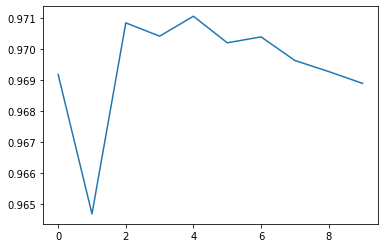

In [20]:
plt.figure()
plt.plot(range(10), score)
plt.show()